In [1]:
from pydantic import BaseModel, Field
from pydantic_ai import Agent
from pydantic_ai import messages as _messages

%load_ext autoreload
%autoreload 2

In [2]:
external_agent = Agent(model="google-gla:gemini-1.5-flash", name="external_agent")

internal_agent = Agent(model="google-gla:gemini-1.5-flash", name="internal_agent")


@external_agent.tool_plain
@internal_agent.tool_plain
def rag_tool(query: str) -> list[str]:
    "Retrieve relevant information from the knowledge base"
    return ["doc1", "doc2", "doc3"]

In [3]:
res = await external_agent.run("What is the capital of France? use the rag tool to answer the question")

/tmp/ipykernel_70826/3103263.py:1: LogfireNotConfiguredWarning: No logs or spans will be created until `logfire.configure()` has been called. Set the environment variable LOGFIRE_IGNORE_NO_CONFIG=1 or add ignore_no_config=true in pyproject.toml to suppress this warning.
  res = await external_agent.run("What is the capital of France? use the rag tool to answer the question")


In [6]:
res2 = await internal_agent.run("What is the capital of France? use the rag tool to answer the question")

In [7]:
res2.all_messages()

[ModelRequest(parts=[UserPromptPart(content='What is the capital of France? use the rag tool to answer the question', timestamp=datetime.datetime(2025, 2, 11, 11, 10, 15, 493371, tzinfo=datetime.timezone.utc), part_kind='user-prompt')], kind='request'),
 ModelResponse(parts=[ToolCallPart(tool_name='rag_tool', args={'query': 'What is the capital of France?'}, tool_call_id=None, part_kind='tool-call')], model_name='gemini-1.5-flash', timestamp=datetime.datetime(2025, 2, 11, 11, 10, 17, 384455, tzinfo=datetime.timezone.utc), kind='response'),
 ModelRequest(parts=[ToolReturnPart(tool_name='rag_tool', content=['doc1', 'doc2', 'doc3'], tool_call_id=None, timestamp=datetime.datetime(2025, 2, 11, 11, 10, 17, 385123, tzinfo=datetime.timezone.utc), part_kind='tool-return')], kind='request'),
 ModelResponse(parts=[TextPart(content='Based on the retrieved documents, the capital of France is Paris.\n', part_kind='text')], model_name='gemini-1.5-flash', timestamp=datetime.datetime(2025, 2, 11, 11, 1

In [10]:
internal_agent._function_tools

{'rag_tool': Tool(function=<function rag_tool at 0x71379124eca0>, takes_ctx=False, max_retries=1, name='rag_tool', description='Retrieve relevant information from the knowledge base', prepare=None, docstring_format='auto', require_parameter_descriptions=False, _is_async=False, _single_arg_name=None, _positional_fields=[], _var_positional_field=None, _parameters_json_schema={'properties': {'query': {'title': 'Query', 'type': 'string'}}, 'required': ['query'], 'type': 'object', 'additionalProperties': False}, current_retry=0)}

In [11]:
external_agent._function_tools

{'rag_tool': Tool(function=<function rag_tool at 0x71379124eca0>, takes_ctx=False, max_retries=1, name='rag_tool', description='Retrieve relevant information from the knowledge base', prepare=None, docstring_format='auto', require_parameter_descriptions=False, _is_async=False, _single_arg_name=None, _positional_fields=[], _var_positional_field=None, _parameters_json_schema={'properties': {'query': {'title': 'Query', 'type': 'string'}}, 'required': ['query'], 'type': 'object', 'additionalProperties': False}, current_retry=0)}

In [3]:
class UserPreferences(BaseModel):
    summary: list[str] = Field(description="The summary of user preferences")


agent = Agent(
    model="google-gla:gemini-1.5-flash",
    result_type=UserPreferences | str,  # type: ignore
    system_prompt=(
        "You're goal is to help the user to find the best smartphone model based on his preferences.\n"
        "- Ask questions one at a time.\n"
        "- Ask no more than 4 questions, but you may finish earlier if you gather enough information.\n"
        "- Focus on key aspects like budget, preferred OS, camera quality, battery life, and screen size.\n"
        "- Be concise but friendly in your questions.\n"
        "- After gathering information, provide a summary of preferences in the result.\n"
        "- Do not recommend specific phone models, just summarize preferences.\n"
        "- If user provides preferences without being asked, incorporate them into your understanding.\n"
        "Return the UserPreferences once you have gathered all the information."
    ),
)

user_prompt = "I'm thinking of buying a new smartphone"
message_history = None
while user_prompt.lower() not in ["exit", "quit", "q"]:
    res = await agent.run(user_prompt=user_prompt, message_history=message_history)
    if isinstance(res.data, UserPreferences):
        break
    user_prompt = input(f"{res.data}   ('q'/'quit'/'exit' to quit) > ")
    message_history = res.all_messages()


/tmp/ipykernel_146195/3647274653.py:28: LogfireNotConfiguredWarning: No logs or spans will be created until `logfire.configure()` has been called. Set the environment variable LOGFIRE_IGNORE_NO_CONFIG=1 or add ignore_no_config=true in pyproject.toml to suppress this warning.
  res = await agent.run(user_prompt=user_prompt, message_history=message_history)


In [5]:
res.data

UserPreferences(summary=['Android OS', 'Budget: $1200', 'Screen size: 6.5+ inches', 'Camera: High quality', 'Battery life: 4000+ mAh'])

In [4]:
res.all_messages()

[ModelRequest(parts=[SystemPromptPart(content="You're goal is to help the user to find the best smartphone model based on his preferences.\n- Ask questions one at a time.\n- Ask no more than 4 questions, but you may finish earlier if you gather enough information.\n- Focus on key aspects like budget, preferred OS, camera quality, battery life, and screen size.\n- Be concise but friendly in your questions.\n- After gathering information, provide a summary of preferences in the result.\n- Do not recommend specific phone models, just summarize preferences.\n- If user provides preferences without being asked, incorporate them into your understanding.\nReturn the UserPreferences once you have gathered all the information.", dynamic_ref=None, part_kind='system-prompt'), UserPromptPart(content="I'm thinking of buying a new smartphone", timestamp=datetime.datetime(2025, 2, 7, 17, 38, 25, 950254, tzinfo=datetime.timezone.utc), part_kind='user-prompt')], kind='request'),
 ModelResponse(parts=[Te

In [5]:
_messages.ModelMessagesTypeAdapter.dump_python(res.all_messages())

[{'parts': [{'content': "You're goal is to help the user to find the best smartphone model based on his preferences.\n- Ask questions one at a time.\n- Ask no more than 4 questions, but you may finish earlier if you gather enough information.\n- Focus on key aspects like budget, preferred OS, camera quality, battery life, and screen size.\n- Be concise but friendly in your questions.\n- After gathering information, provide a summary of preferences in the result.\n- Do not recommend specific phone models, just summarize preferences.\n- If user provides preferences without being asked, incorporate them into your understanding.\nReturn the UserPreferences once you have gathered all the information.",
    'dynamic_ref': None,
    'part_kind': 'system-prompt'},
   {'content': "I'm thinking of buying a new smartphone",
    'timestamp': datetime.datetime(2025, 2, 7, 17, 38, 25, 950254, tzinfo=datetime.timezone.utc),
    'part_kind': 'user-prompt'}],
  'kind': 'request'},
 {'parts': [{'content

In [7]:
class MyPydanticModel(BaseModel):
    main_item: str
    features: list[str] = Field(description="At least 4 features", min_length=4)


In [9]:
Path("message_history.json").write_bytes(res.all_messages_json())

2596

In [3]:
class Weather(BaseModel):
    weather_description: str = Field(min
        description="Write a nice description if weather anything but sunny. If it is sunny, leave it empty"
    )


agent = Agent("google-gla:gemini-2.0-flash-001", result_type=Weather)

In [10]:
res = await agent.run("weather is sunny")

In [11]:
res.all_messages()

[ModelRequest(parts=[UserPromptPart(content='weather is sunny', timestamp=datetime.datetime(2025, 2, 5, 23, 24, 22, 690327, tzinfo=datetime.timezone.utc), part_kind='user-prompt')], kind='request'),
 ModelResponse(parts=[ToolCallPart(tool_name='final_result', args={'weather_description': ''}, tool_call_id=None, part_kind='tool-call')], model_name='gemini-2.0-flash-001', timestamp=datetime.datetime(2025, 2, 5, 23, 24, 24, 732792, tzinfo=datetime.timezone.utc), kind='response'),
 ModelRequest(parts=[ToolReturnPart(tool_name='final_result', content='Final result processed.', tool_call_id=None, timestamp=datetime.datetime(2025, 2, 5, 23, 24, 24, 734331, tzinfo=datetime.timezone.utc), part_kind='tool-return')], kind='request')]

In [17]:
agent._result_schema.tools["final_result"].tool_def.

ToolDefinition(name='final_result', description='The final response which ends this conversation', parameters_json_schema={'properties': {'weather_description': {'description': 'Write a nice description if weather anything but sunny. If it is sunny, leave it empty', 'title': 'Weather Description', 'type': 'string'}}, 'required': ['weather_description'], 'title': 'Weather', 'type': 'object'}, outer_typed_dict_key=None)

In [25]:
@dataclass
class GraphDeps:
    name: str
    age: int | None = None


@dataclass
class DivisibleBy5(BaseNode[None, GraphDeps, str]):
    foo: int

    async def run(self, ctx: GraphRunContext[None, GraphDeps]) -> Increment | End[str]:
        if self.foo % 5 == 0:
            ctx.deps.age = self.foo
            return End(f"{ctx.deps.name}'s age is divisible by 5")
        else:
            return Increment(self.foo)


@dataclass
class Increment(BaseNode[None, GraphDeps]):
    foo: int

    async def run(self, ctx: GraphRunContext[None, GraphDeps]) -> DivisibleBy5:
        print(ctx)
        return DivisibleBy5(self.foo + 1)


fives_graph = Graph(nodes=[DivisibleBy5, Increment])


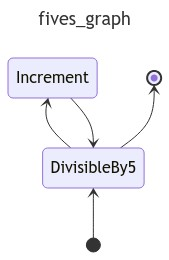

In [24]:
display(Image(fives_graph.mermaid_image(start_node=DivisibleBy5, theme="default", direction="BT")))

In [26]:
deps = GraphDeps(name="hamza")
res = await fives_graph.run(DivisibleBy5(1), deps=deps)


/tmp/ipykernel_75869/1026510327.py:2: LogfireNotConfiguredWarning: No logs or spans will be created until `logfire.configure()` has been called. Set the environment variable LOGFIRE_IGNORE_NO_CONFIG=1 or add ignore_no_config=true in pyproject.toml to suppress this warning.
  res = await fives_graph.run(DivisibleBy5(1), deps=deps)


GraphRunContext(state=None, deps=GraphDeps(name='hamza', age=None))
GraphRunContext(state=None, deps=GraphDeps(name='hamza', age=None))
GraphRunContext(state=None, deps=GraphDeps(name='hamza', age=None))
GraphRunContext(state=None, deps=GraphDeps(name='hamza', age=None))


In [37]:
fives_graph.snapshot_state()

TypeError: deep_copy_state() missing 1 required positional argument: 'state'

In [5]:
def greeting() -> str:
    """greeting Hello, This tool is to say 'Hello'."""
    print("*********** Called function say_hello .")
    return "hey brooo"


# Create an agent
agent = Agent(
    model="google-gla:gemini-2.0-flash-exp",
    system_prompt=(
        "You are a very friendly assistant. Always use the `greeting` function to start the response "
        "Do not add any extra text or explanations."
    ),
    tools=[greeting],
)

In [6]:
res = await agent.run("hellooo")

In [7]:
res.all_messages()

[ModelRequest(parts=[SystemPromptPart(content='You are a very friendly assistant. Always use the `greeting` function to start the response Do not add any extra text or explanations.', dynamic_ref=None, part_kind='system-prompt'), UserPromptPart(content='hellooo', timestamp=datetime.datetime(2025, 1, 27, 8, 36, 17, 117837, tzinfo=datetime.timezone.utc), part_kind='user-prompt')], kind='request'),
 ModelResponse(parts=[ToolCallPart(tool_name='greeting', args=ArgsDict(args_dict={}), tool_call_id=None, part_kind='tool-call')], model_name='gemini-2.0-flash-exp', timestamp=datetime.datetime(2025, 1, 27, 8, 36, 18, 783322, tzinfo=datetime.timezone.utc), kind='response'),
 ModelRequest(parts=[ToolReturnPart(tool_name='greeting', content='hey brooo', tool_call_id=None, timestamp=datetime.datetime(2025, 1, 27, 8, 36, 18, 786157, tzinfo=datetime.timezone.utc), part_kind='tool-return')], kind='request'),
 ModelResponse(parts=[TextPart(content='hey brooo\n', part_kind='text')], model_name='gemini-2

In [8]:
res.data

'hey brooo\n'